# Course Information
DDS8555 - Predictive Analysis<br>
Assignment 4<br>
Implement Linear Regression using the Abalone Dataset from Kaggle.com.

By - Samuel Mbah Nde
Due Date and Time: Sunday February 16th 2025 at 11:59PM PST.

#  **Regression with the Abalone Dataset: Introduction and Goal**

## **Introduction**
The Abalone dataset is a well-known dataset used in predictive analytics and machine learning. It consists of various physical measurements of abalones, a type of marine mollusk, and aims to predict the age of an abalone based on these attributes. Since abalones do not have easily countable growth rings like trees, estimating their age is crucial for ecological research and commercial fisheries.

The dataset includes the following features.


| Variable Name | Role | Type | Description | Units | Missing Values | 
|---|---|---|---|---|---|
| Sex | Feature | Categorical | M, F, and I (infant) |  | no | 
| Length | Feature | Continuous | Longest shell measurement | mm | no | | Diameter | Feature | Continuous | Perpendicular to length | mm | no  
 | Height | Feature | Continuous | With meat in shell | mm | no|
 | Whole_weight | Feature | Continuous | Whole abalone | grams o| n  
 | Shucked_weight | Feature | Continuous | Weight of meat | gramns | o| 
 | Viscera_weight | Feature | Continuous | Gut weight (after bleeding) | gr ams |n | 
 | Shell_weight | Feature | Continuous | After being dried | g| rams  o | 
 | Rings | Target | Integer | +1.5 gives the age in years | 

 ## **Goal of This Exercise**
The objective of this regression task is to develop a predictive model that estimates the number of rings in an abalone based on its physical attributes. The key steps include:
1. **Exploratory Data Analysis (EDA)**: Understanding the dataset, identifying patterns, and handling missing values or outliers.
2. **Feature Engineering & Preprocessing**: Encoding categorical variables, normalizing numerical features, and selecting relevant predictors.
3. **Model Development**: Implementing a linear regression model to predict the target variable.
4. **Model Evaluation**: Assessing performance using appropriate regression metrics such as RMSE and R².
5. **Predictions on the Test Set**: Applying the trained model to make predictions and evaluating its generalization capability.
6. **Participate in the Kaggle competition**: Submit the produced model as late submission for this dataset.

Through this process, we will gain insights into feature relationships and assess how well linear regression models can capture the dependencies within the dataset.| no | 

## Import the packages needed to load and analyze the data set
I will load all the packages needed in one place to keep my code organized.

In [4]:
import math
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from scipy.stats import probplot
import re, os, json, requests, random
from datetime import datetime, timedelta, timezone
from sklearn.linear_model import LinearRegression, LogisticRegression, ElasticNet, ElasticNetCV, LassoCV
import sklearn.linear_model as skl
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, KFold, train_test_split, GridSearchCV, KFold
from sklearn.metrics import (mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score, f1_score,
                            confusion_matrix, ConfusionMatrixDisplay, classification_report)
from sklearn.pipeline import Pipeline
from sklearn import datasets
from ISLP import load_data
from ISLP.models import ModelSpec, poly

## Set seed to ensure work is reproducible.

In [6]:
random.seed(6222)

## Load the data into pandas dataframes

In [8]:
path_to_data_files = 'Data/playground-series-s4e4'
train = pd.read_csv(f"{path_to_data_files}/train.csv")
test = pd.read_csv(f"{path_to_data_files}/test.csv")
sample_submission = pd.read_csv(f"{path_to_data_files}/sample_submission.csv")

train.shape, test.shape, sample_submission.shape 

((90615, 10), (60411, 9), (60411, 2))

## EDA

In this section, I will 
1) Inpect the datasets.
2) Check for the presense of NAs.
3) Rename columns to make it easier to explore using column dot notation.
4) Visuallize the data.

In [10]:
train.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


## Check for the Presense of NAs
The dataset documention indicates that there should be no nulls in the dataset.

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  object 
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Whole weight.1  90615 non-null  float64
 7   Whole weight.2  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 6.9+ MB


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60411 entries, 0 to 60410
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              60411 non-null  int64  
 1   Sex             60411 non-null  object 
 2   Length          60411 non-null  float64
 3   Diameter        60411 non-null  float64
 4   Height          60411 non-null  float64
 5   Whole weight    60411 non-null  float64
 6   Whole weight.1  60411 non-null  float64
 7   Whole weight.2  60411 non-null  float64
 8   Shell weight    60411 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.1+ MB


## Rename Columns
Column names in the loaded data contain spaces which make them difficult to manipulate with dot notation.

From visually inspecting the column names, I see that there is a trend that can be used to reginerate new column names by removing white spaces and special characters and converting the words into title case.

In [15]:
def rename_column(column_name: str):
    words_in_column_name = re.findall(r'\w+', column_name)
    return ''.join([word.title() for word in words_in_column_name])

train.columns = [rename_column(column_name) for column_name in train.columns]
test.columns = [rename_column(column_name) for column_name in test.columns]

train.head()

,Id,Sex,Length,Diameter,Height,WholeWeight,WholeWeight1,WholeWeight2,ShellWeight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [16]:
test.head()

,Id,Sex,Length,Diameter,Height,WholeWeight,WholeWeight1,WholeWeight2,ShellWeight
0,90615,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,90616,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,90617,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,90618,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,90619,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050


In [17]:
test.rename(columns={'WholeWeight1': 'ShuckedWeight', 'WholeWeight2': 'VisceraWeight'}, inplace=True)
train.rename(columns={'WholeWeight1': 'ShuckedWeight', 'WholeWeight2': 'VisceraWeight'}, inplace=True)
train.head()

,Id,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


## Create a summary table of metrics to compare.
Below, I compute summary statistics on train and test sets and merge them to compare. This approach will help with quickly spotting any columns that are unevenly distributed in the test and training sets.

In [19]:
def round_values(value, dp=3):
    if type(value) in [str, int]:
        return value
    return round(value, dp)

def get_outliers_iqr(data:list):
    """Detects outliers in a list of numbers using the IQR method."""
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = []
    for num in data:
        if num < lower_bound or num > upper_bound:
            outliers.append(num)
    return outliers

def compute_summary_numbers(df):
    summary_metrics = []
    total_recs = df.shape[0]
    for column in df.columns:
        values = df[column].values.tolist()  # Corrected column access
        n_unique = len(set(values))
        number_of_nulls = df[column].isna().sum()  # Calculate nulls directly
        number_of_valid = total_recs - number_of_nulls
        data_type = str(df[column].dtype)
        mean = np.mean(values)
        std = np.std(values)
        fisher_kurtosis = stats.kurtosis(values, fisher=True)
        pearson_kurtosis = stats.kurtosis(values, fisher=False)
        skewness = stats.skew(values)
        min_value = min(values)
        max_value = max(values)
        percentile_25 = np.percentile(values, 25)
        percentile_50 = np.percentile(values, 50)
        percentile_75 = np.percentile(values, 75)
        iqr = percentile_75 - percentile_25
        lower_bound = percentile_25 - 1.5 * iqr
        upper_bound = percentile_75 + 1.5 * iqr

        outliers = [value for value in values if value > upper_bound or value < lower_bound]
        if(data_type == 'object'):
            data_type = 'str'
        outliers_percentage = 100* len(outliers)/total_recs
        completeness = round(100* number_of_nulls / total_recs, 3)  # Calculate completeness
        raw_values = [column, data_type, n_unique, mean, std, fisher_kurtosis, pearson_kurtosis, skewness,
                      min_value, percentile_25, percentile_50, percentile_75, max_value, len(outliers), outliers_percentage]
        rounded_values = [round_values(value) for value in raw_values]
        summary_metrics.append(rounded_values)
    return pd.DataFrame(summary_metrics, columns=['ColumnName', 'DataType', 'NUnique', 'Mean', 'Std', 'FisherKurtosis', 'PeasonKurtosis',
                                       'Skewness', 'Min', '25thPercentile', '50thPercentile', '75thPercentile', 'Max', 'NOutliers', 'OutliersPercent'])

# Create a DataFrame from the collected summary statistics
train_summary = compute_summary_numbers(train.drop(['Id', 'Rings', 'Sex'], axis = 1))
test_summary = compute_summary_numbers(test.drop(['Id', 'Sex'], axis = 1))
train_summary

,ColumnName,DataType,NUnique,Mean,Std,FisherKurtosis,PeasonKurtosis,Skewness,Min,25thPercentile,50thPercentile,75thPercentile,Max,NOutliers,OutliersPercent
0,Length,float64,157,0.517,0.118,0.133,3.133,-0.732,0.075,0.445,0.545,0.600,0.815,1460,1.611
1,Diameter,float64,126,0.402,0.098,0.001,3.001,-0.695,0.055,0.345,0.425,0.470,0.650,1580,1.744
2,Height,float64,90,0.135,0.038,13.453,16.453,0.310,0.000,0.110,0.140,0.160,1.130,348,0.384
3,WholeWeight,float64,3175,0.789,0.458,-0.185,2.815,0.429,0.002,0.419,0.800,1.068,2.825,574,0.633
4,ShuckedWeight,float64,1799,0.341,0.204,0.284,3.284,0.592,0.001,0.178,0.330,0.463,1.488,967,1.067
5,VisceraWeight,float64,979,0.169,0.101,-0.204,2.796,0.477,0.001,0.086,0.166,0.232,0.760,440,0.486
6,ShellWeight,float64,1129,0.226,0.130,0.096,3.096,0.479,0.002,0.120,0.225,0.305,1.005,671,0.740


In [20]:
test_summary['DataSource'] = 'Test'
train_summary['DataSource'] = 'Train'

summary_stats = pd.concat(objs=[test_summary, train_summary], axis = 0)
summary_stats.sort_values(by=['ColumnName', 'DataSource'], inplace = True, ignore_index = True)
summary_stats.to_csv('SummaryOfDescriptiveStatisticsFromAbaloneDataset.csv', index = False)
summary_stats

,ColumnName,DataType,NUnique,Mean,Std,FisherKurtosis,PeasonKurtosis,Skewness,Min,25thPercentile,50thPercentile,75thPercentile,Max,NOutliers,OutliersPercent,DataSource
0,Diameter,float64,130,0.402,0.097,0.004,3.004,-0.696,0.055,0.345,0.425,0.470,0.650,987,1.634,Test
1,Diameter,float64,126,0.402,0.098,0.001,3.001,-0.695,0.055,0.345,0.425,0.470,0.650,1580,1.744,Train
2,Height,float64,85,0.136,0.038,17.692,20.692,0.554,0.000,0.110,0.140,0.160,1.095,225,0.372,Test
3,Height,float64,90,0.135,0.038,13.453,16.453,0.310,0.000,0.110,0.140,0.160,1.130,348,0.384,Train
4,Length,float64,148,0.517,0.118,0.142,3.142,-0.735,0.075,0.450,0.545,0.600,0.800,1110,1.837,Test
5,Length,float64,157,0.517,0.118,0.133,3.133,-0.732,0.075,0.445,0.545,0.600,0.815,1460,1.611,Train
6,ShellWeight,float64,1089,0.226,0.130,0.043,3.043,0.469,0.002,0.120,0.225,0.305,1.004,432,0.715,Test
7,ShellWeight,float64,1129,0.226,0.130,0.096,3.096,0.479,0.002,0.120,0.225,0.305,1.005,671,0.740,Train
8,ShuckedWeight,float64,1747,0.341,0.204,0.290,3.290,0.593,0.001,0.178,0.329,0.464,1.488,579,0.958,Test
9,ShuckedWeight,float64,1799,0.341,0.204,0.284,3.284,0.592,0.001,0.178,0.330,0.463,1.488,967,1.067,Train


In [21]:
summary_stats.to_clipboard(index = False)

## **Observations from the summary statistics comparison table**
From the table, one can see that the range of value of both train and test sets are very similar.

This gives us confidence in training model on the train set and evaluating on the test set.

In [23]:
train.Sex.value_counts()

Sex
I    33093
M    31027
F    26495
Name: count, dtype: int64

In [24]:
test.Sex.value_counts()

Sex
I    22241
M    20783
F    17387
Name: count, dtype: int64

## Visuallising the data
I first start with a pairplot of the training set.

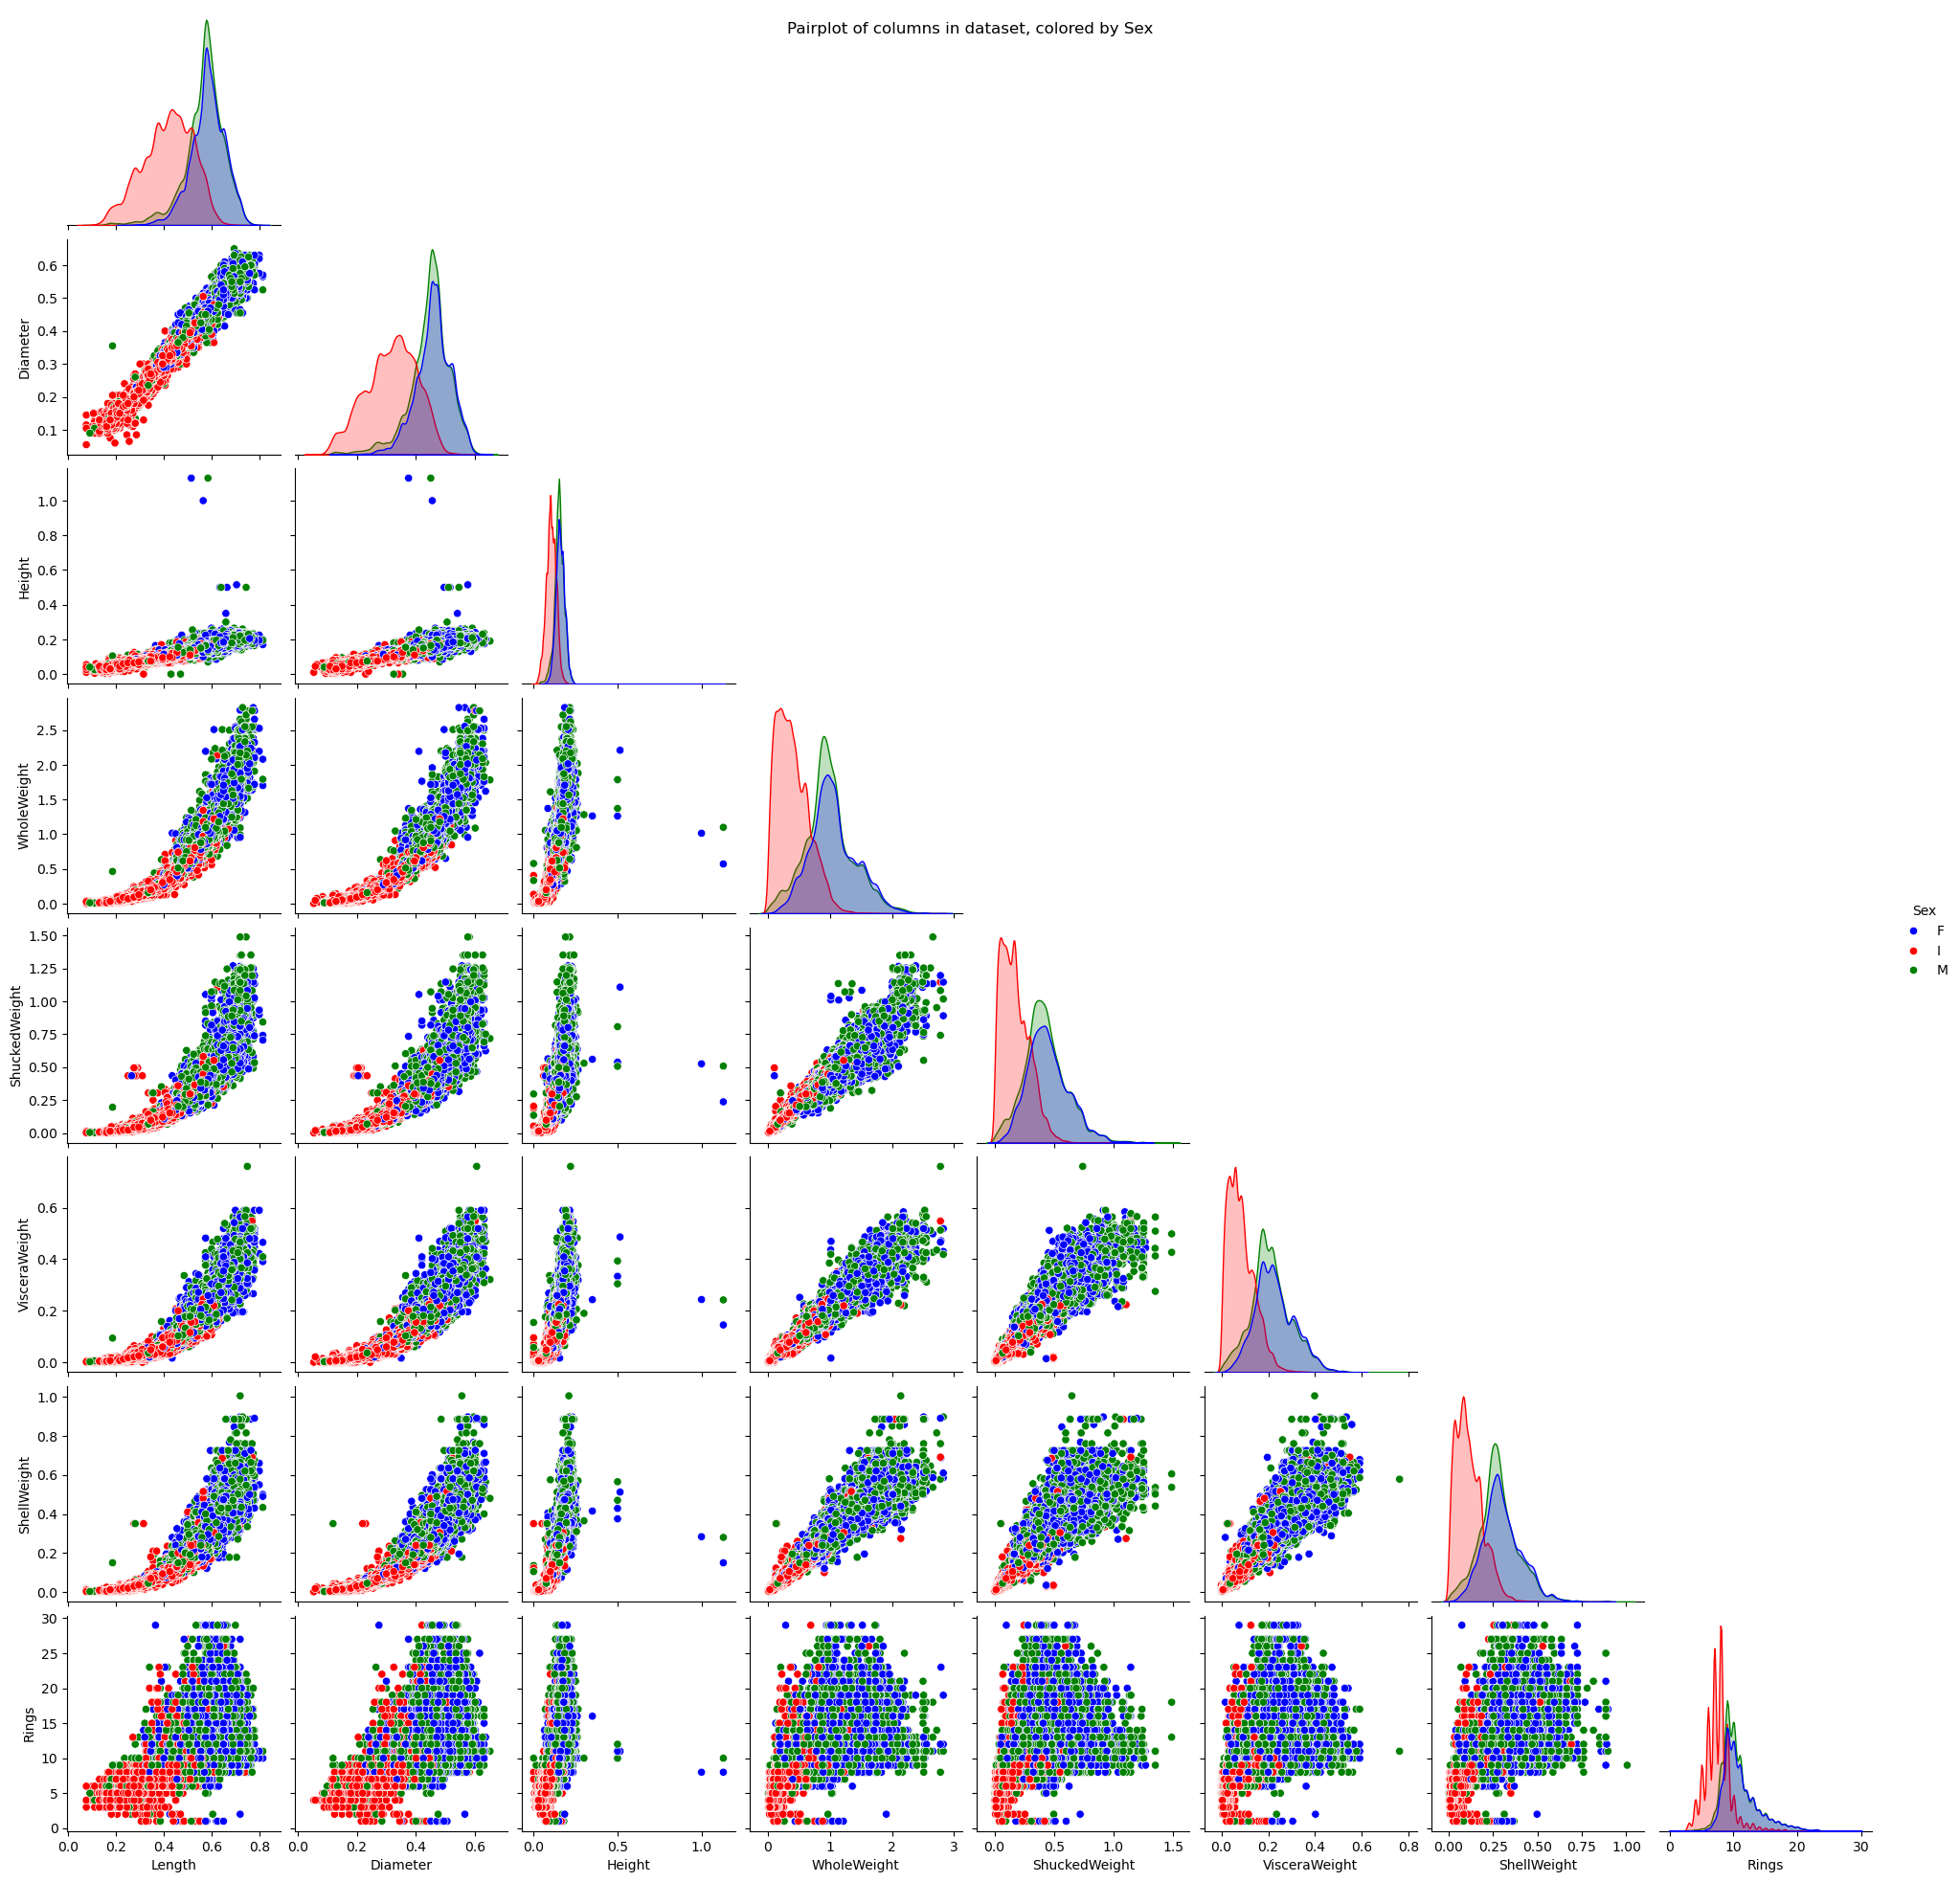

In [26]:
colors = [
    "blue",
    "red",
    "green",
    "gray",
    "orange",
    "purple",
    "brown",
    "pink",
    "cyan",
    "magenta"
]

g = sns.pairplot(train.drop('Id', axis=1), corner=True, diag_kind='kde', hue='Sex', palette=colors[:train.Sex.nunique()])
# Set the title of the plot
g.fig.suptitle("Pairplot of columns in dataset, colored by Sex")
plt.show()


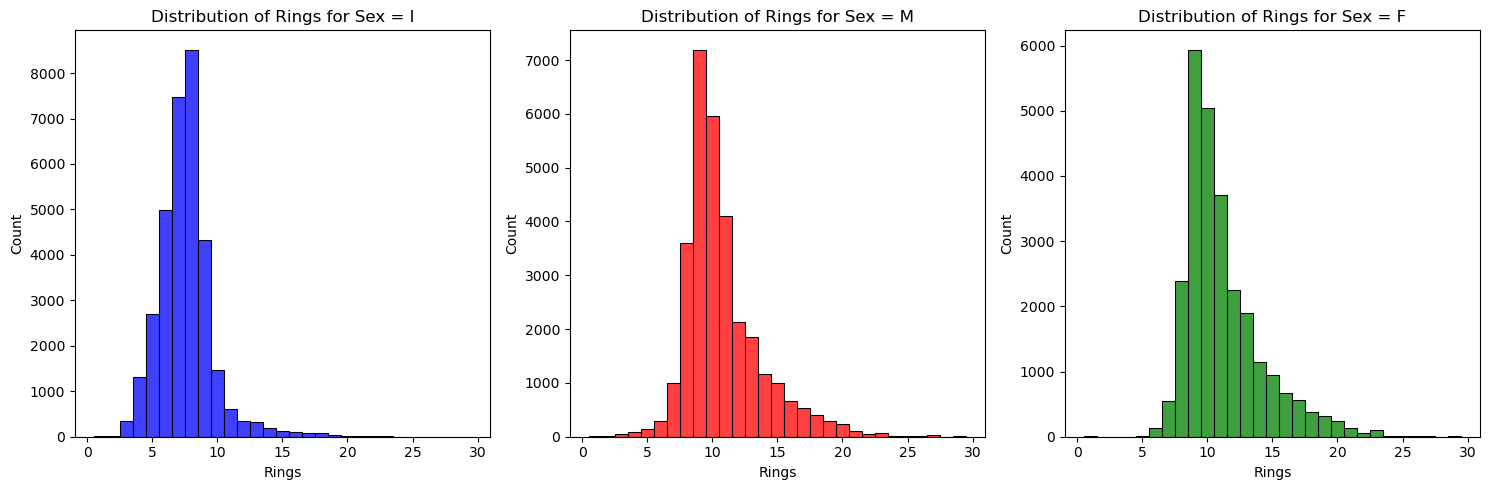

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

sex_categories = ['I', 'M', 'F']

for i, sex in enumerate(sex_categories):
    subset = train[train['Sex'] == sex]
    sns.histplot(data=subset, x="Rings", discrete=True, color=colors[i], ax=axes[i]) #color each sex differently

    axes[i].set_title(f"Distribution of Rings for Sex = {sex}") # Set title for each plot
    axes[i].set_xlabel("Rings") # Set x label for each plot
    axes[i].set_ylabel("Count") # Set y label for each plot

plt.tight_layout() 
plt.show()


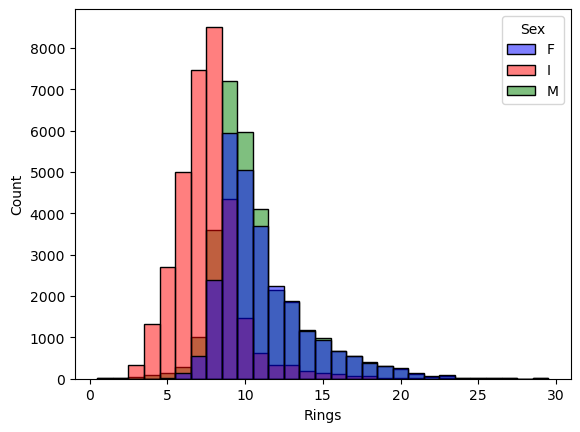

In [28]:
sns.histplot(data=train, x="Rings", hue="Sex", discrete=True, palette=colors[:train.Sex.nunique()])
plt.show()

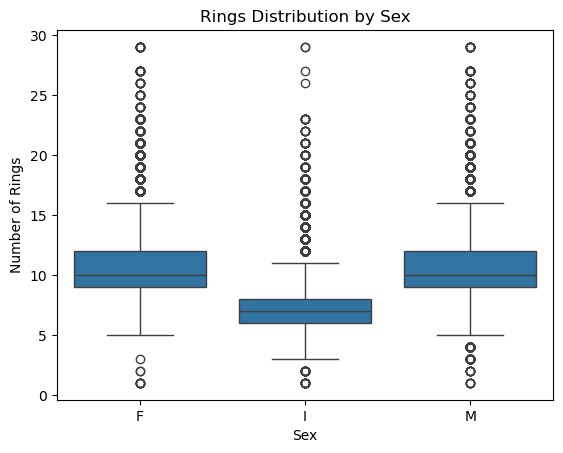

In [29]:
# Create the boxplot using seaborn
sns.boxplot(x='Sex', y='Rings', data=train)

# Customize the plot (optional)
plt.title('Rings Distribution by Sex')
plt.xlabel('Sex')
plt.ylabel('Number of Rings')

# Show the plot
plt.show()

## Observations from pairplots.
The graph shows that the relationship between the Rings and almost all the columns is roughly linear.

The graph also shows that the values of `Sex = I` are generally lower and distinct from those for Sexes `M and F` which show a very similar distributions.

## Create dummy variables for Sex

Since sex is categorical, I will create dummy variables for Sex to make before creating a model to ensure that the Sex is properly captured in the train and test sets.

In [32]:
def form_dummies(df, column_name, dummy_value):
    df[f"{column_name}_{dummy_value}"] = df[column_name].apply(lambda x: 1 if x == dummy_value else 0)
    return df

In [33]:
for sex_value in list('MF'):
    train = form_dummies(train, 'Sex', sex_value)
    test = form_dummies(test, 'Sex', sex_value)
train.drop(columns=['Sex'], inplace=True)
test.drop(columns=['Sex'], inplace=True)
train.head()

,Id,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,Sex_M,Sex_F
0,0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11,0,1
1,1,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11,0,1
2,2,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6,0,0
3,3,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10,1,0
4,4,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9,0,0


In [34]:
test.head()

,Id,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Sex_M,Sex_F
0,90615,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005,1,0
1,90616,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750,1,0
2,90617,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405,1,0
3,90618,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350,1,0
4,90619,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050,0,0


## Note about getting dummies on train and test set.
Even though just applying get dummies on the test set is enough in this case because earlier inspection proved that both train and test sets included all the unique value of Sex. If this is not the case, one would have to ensure that the test set gets the same number of dummies. One approach for achieving this could be to append a fake (few) record(s) in the data set that is not fully covered or creating a new column.

Additionally, the dummies results in columns that may not share the same indexes in training and test sets. To ensure data in training set aligns with test set, it is a good idea to reindex both dataframes which I do below.

In [36]:
train_columns = [c for c in train.columns if c != 'Rings'] + ['Rings']
model_columns = train_columns[1:-1]
train = train[train_columns]
test = test[train_columns[:-1]]
train

,Id,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Sex_M,Sex_F,Rings
0,0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,0,1,11
1,1,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,0,1,11
2,2,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,0,0,6
3,3,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,1,0,10
4,4,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...
90610,90610,0.335,0.235,0.075,0.1585,0.0685,0.0370,0.0450,1,0,6
90611,90611,0.555,0.425,0.150,0.8790,0.3865,0.1815,0.2400,1,0,9
90612,90612,0.435,0.330,0.095,0.3215,0.1510,0.0785,0.0815,0,0,6
90613,90613,0.345,0.270,0.075,0.2000,0.0980,0.0490,0.0700,0,0,6


In [37]:
test

,Id,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Sex_M,Sex_F
0,90615,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005,1,0
1,90616,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750,1,0
2,90617,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405,1,0
3,90618,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350,1,0
4,90619,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050,0,0
...,...,...,...,...,...,...,...,...,...,...
60406,151021,0.345,0.260,0.085,0.1775,0.0735,0.0265,0.0500,0,0
60407,151022,0.525,0.410,0.145,0.8445,0.3885,0.1670,0.2050,0,1
60408,151023,0.590,0.440,0.155,1.1220,0.3930,0.2000,0.2650,0,0
60409,151024,0.660,0.525,0.190,1.4935,0.5885,0.3575,0.4350,0,1


## Compute and Print Mean Errors.
Design a function to compute these errors and then I print them to the console.
The required method of evaluation from this dataset is in the screenshot below but I also add other evaluation methods.

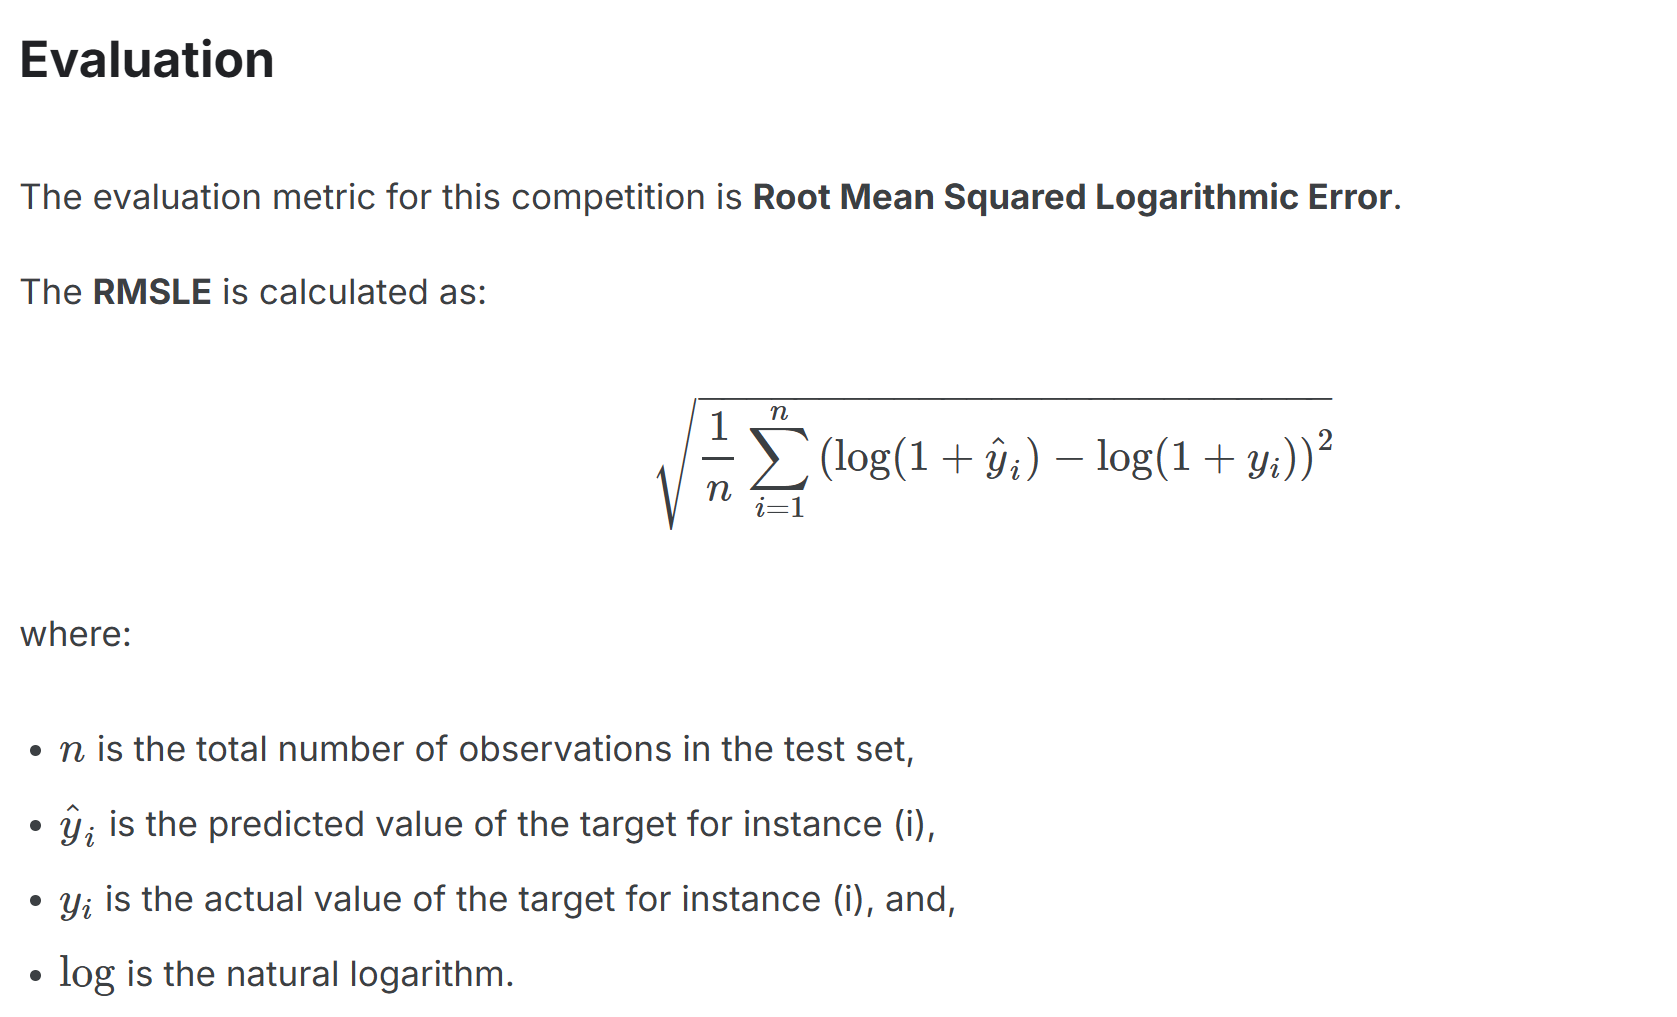

In [39]:
def adjusted_r2(y_true, y_pred, n, p):
    """
    Calculates the adjusted R-squared value.

    Parameters:
        y_true: True target values.
        y_pred: Predicted target values.
        n: Number of data points.
        p: Number of independent variables.
    """
    r2 = r2_score(y_true, y_pred)
    return 1 - (1 - r2) * ((n - 1) / (n - p - 1))

In [40]:
def compute_and_print_mean_errors(y,yhat, params, title=None): 
    n_records = len(y)
    ME=np.round(np.mean(y-yhat),3) 
    MPE=np.round(np.mean((y-yhat)/y),3) 
    myMAE=np.round(mean_absolute_error(y,yhat),3) 
    myMSE=np.round(mean_squared_error(y,yhat),3) 
    myMAPE=np.round(mean_absolute_percentage_error(y,yhat),3)
    myRMSLogError = np.sqrt(np.average(np.square(np.log(1+np.abs(yhat)) - np.abs(1 + np.log(y)))))
    myR2 = r2_score(y, yhat)
    adjR2 = 1 - (1 - myR2) * ((n_records - 1) / (n_records - params - 1))
    if title:
        l = len(title) + 1
        print(f'\n{title}')
        print('-'*l)
    print("\n","ME:", np.round(ME,3),"\n","MPE:",MPE,"\n", "MAE:",  myMAE,"\n", "MSE:", myMSE,"\n","MAPE:",myMAPE,"\n myRMSLogError:", myRMSLogError,"\n R2:", myR2,"\n adjR2:", adjR2)
    return [ME, MPE, myMAE, myMSE, myMAPE, myRMSLogError, myR2, adjR2]

## Divide the dataset into training and test sets.
Sample 80% of the data for a training set stratifying on the `Sex` dummy column.

In [42]:
X_train, X_test, y_train, y_test = train_test_split(train.iloc[:, 1:-1], train.iloc[:,-1], test_size=0.15, random_state=622, stratify=train['Sex_F	Sex_M'.split()])
# Add a constant to the predictors (for the intercept)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the multiple regression model
model1 = sm.OLS(y_train, X_train).fit()

# Print the summary of the model
print(model1.summary())

# Extracting specific metrics
degrees_of_freedom_model = model1.df_model  # Model degrees of freedom
degrees_of_freedom_residual = model1.df_resid  # Residual degrees of freedom
f_statistic = model1.fvalue  # F-statistic
p_value = model1.f_pvalue  # p-value of the overall model significance
params = len(model1.params)-1
# Print key metrics
print("\nKey Metrics:")
print(f"Degrees of Freedom (Model): {degrees_of_freedom_model}")
print(f"Degrees of Freedom (Residual): {degrees_of_freedom_residual}")
print(f"F-statistic: {f_statistic}")
print(f"P-value of the overall model significance: {p_value}")

y_pred_test1 = model1.predict(X_test)
print('predicted', len(y_pred_test1), len(y_test))
compute_and_print_mean_errors(y_test, y_pred_test1, params)

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                 1.307e+04
Date:                Tue, 18 Feb 2025   Prob (F-statistic):               0.00
Time:                        03:22:13   Log-Likelihood:            -1.6258e+05
No. Observations:               77022   AIC:                         3.252e+05
Df Residuals:                   77012   BIC:                         3.253e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.1484      0.059     53.529

[-0.002,
 -0.034,
 1.37,
 3.919,
 0.138,
 0.8967330849415274,
 0.6129027499902755,
 0.6126462620825903]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(train.iloc[:, 1:-1], train.iloc[:,-1], test_size=0.15, random_state=622, stratify=train['Sex_F	Sex_M'.split()])

# Add a constant to the predictors (for the intercept)
poly = PolynomialFeatures(degree = 2, interaction_only=False, include_bias=False)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

# Fit the linear regression model
model2 = LinearRegression()
model2.fit(X_train, y_train)
r2 = model2.score(X_test, y_test)
params = model2.n_features_in_ - 1
y_pred_test2 = model2.predict(X_test)
print(f'The coefficient of determination is {r2}')
compute_and_print_mean_errors(y_test, y_pred_test2, params)

The coefficient of determination is 0.6395271283424694

 ME: 0.003 
 MPE: -0.029 
 MAE: 1.316 
 MSE: 3.649 
 MAPE: 0.132 
 myRMSLogError: 0.8976783712836359 
 R2: 0.6395271283424694 
 adjR2: 0.6378217569803994


[0.003,
 -0.029,
 1.316,
 3.649,
 0.132,
 0.8976783712836359,
 0.6395271283424694,
 0.6378217569803994]

## Observations from the Two models.
We see that the second model outperforms the first model in every metric but the first model is only linear while the second model is polynomial. The second model is an improvement because it uses interactions and higher order terms which should capture the relationship much better. This makes sense when you factor in the fact that the pairplot we had earlier showed that there is some polynomial relationship between some of the variables. The second model with polynomial features seems to capture the relationship much better.

These observations can be summarized in the fitted vs observed plots below.

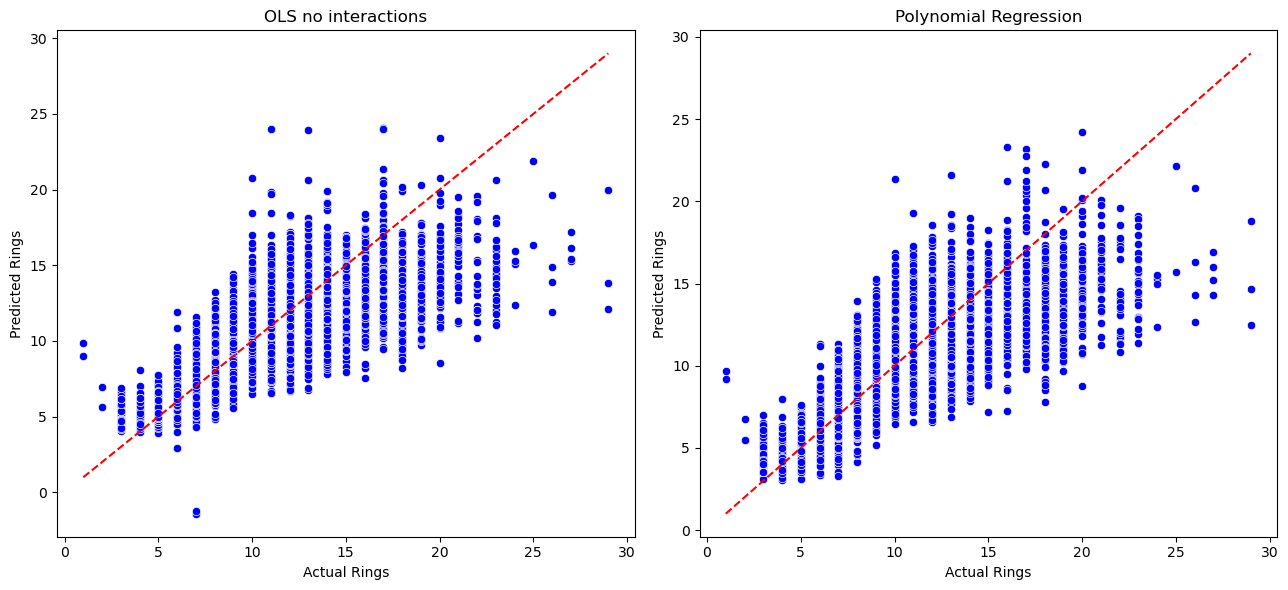

In [45]:

fig, axes = plt.subplots(1, 2, figsize=(13, 6))  # 1 row, 3 columns

sns.scatterplot(y=y_pred_test1,  x= y_test, ax=axes[0], color = 'blue')
sns.scatterplot(y=y_pred_test2, x= y_test, ax=axes[1], color = 'blue') 
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[0].set_title(f"OLS no interactions") # Set title for each plot
axes[0].set_xlabel("Actual Rings") # Set x label for each plot
axes[0].set_ylabel("Predicted Rings") # Set y label for each plot


axes[1].set_title(f"Polynomial Regression") # Set title for each plot
axes[1].set_xlabel("Actual Rings") # Set x label for each plot
axes[1].set_ylabel("Predicted Rings") # Set y label for each plot

plt.tight_layout()  # Adjust layout to prevent overlapping titles/labels
plt.show()


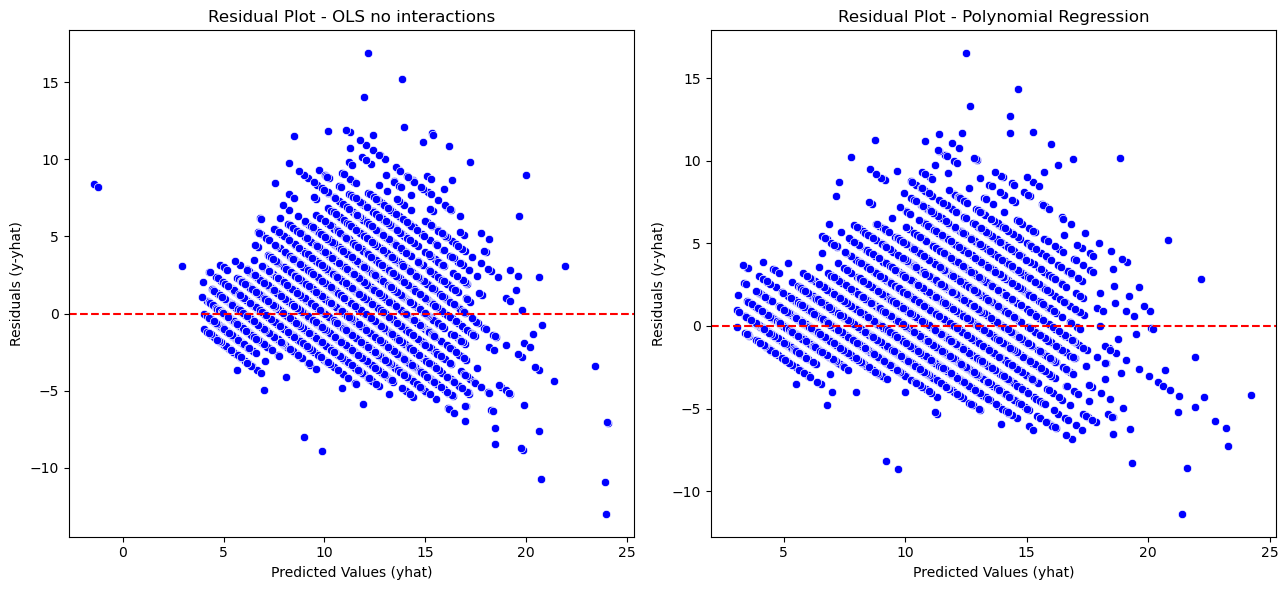

In [46]:
residuals1 = y_test - y_pred_test1
residuals2 = y_test - y_pred_test2
fig, axes = plt.subplots(1, 2, figsize=(13, 6))  # 1 row, 3 columns

sns.scatterplot(x= y_pred_test1, y=residuals1, ax=axes[0], color = 'blue')
sns.scatterplot(x= y_pred_test2, y=residuals2, ax=axes[1], color = 'blue')
axes[0].axhline(y = 0, color='red', linestyle='--')
axes[1].axhline(y = 0, color='red', linestyle='--')
axes[0].set_title(f"Residual Plot - OLS no interactions")
axes[0].set_xlabel("Predicted Values (yhat)")
axes[0].set_ylabel("Residuals (y-yhat)")


axes[1].set_title(f"Residual Plot - Polynomial Regression")
axes[1].set_xlabel("Predicted Values (yhat)")
axes[1].set_ylabel("Residuals (y-yhat)")

plt.tight_layout()  # Adjust layout to prevent overlapping titles/labels
plt.show()

## Observations from residual plots
The residual plots do not show any clear trend in residuals. From the plot, one can see large residuals on both sides of the horizontal line at y = 0 indicating that the trend is mostly captured but the dataset has a lot of outliers.

Also, the second model does not predict any negative values.

## Prepare data for submission
I now turn my focus to use the second model to predict values and submit for the competition.

In [49]:
X = test.iloc[:, 1:]
X = sm.add_constant(X)
X = poly.transform(X)
y_pred = model2.predict(X)
output_df = test[['Id']].copy()
output_df['Rings'] = y_pred
output_df.columns = ['id', 'Rings']
output_df.to_csv('submission2.csv', index = False)
output_df.head()

,id,Rings
0,90615,9.249889
1,90616,9.734753
2,90617,10.457409
3,90618,10.145885
4,90619,7.659557


In [50]:
X = test.iloc[:, 1:]
X = sm.add_constant(X)
X = poly.transform(X)
y_pred = model2.predict(X)
output_df = test[['Id']].copy()
output_df['Rings'] = y_pred
output_df.columns = ['id', 'Rings']
output_df.to_csv('submission1.csv', index = False)
output_df.head()

,id,Rings
0,90615,9.249889
1,90616,9.734753
2,90617,10.457409
3,90618,10.145885
4,90619,7.659557


# Week 3
This week, I will create two models, one using Principal component regression and the other using Lasso regression to inform the process of variable selection.

## Principal Component for Regression.

To use principal components for Regression, I will follow the following steps:
- standardize the data.
- Use Grid search to find the best number of principal components.
- Fit a model based on the optimal number of components determined in the previous step.

In [52]:
pca = PCA(n_components=5)
linreg = LinearRegression()

scaler = StandardScaler(with_mean=True,  with_std=True)
pipe = Pipeline([('scaler', scaler), 
                 ('pca', pca),
                 ('linreg', linreg)])
X = train[model_columns].values
Y = train['Rings'].values
pipe.fit(X, Y)
pipe.named_steps['linreg'].coef_


array([ 0.7858737 ,  0.01301444, -0.79038682,  1.23997866,  2.31584348])

In [53]:
train_columns[1:-1]

['Length',
 'Diameter',
 'Height',
 'WholeWeight',
 'ShuckedWeight',
 'VisceraWeight',
 'ShellWeight',
 'Sex_M',
 'Sex_F']

In [54]:
param_grid = {'pca__n_components': range(1, len(train_columns[:-1]))}
K=10
kfold = KFold(K,
                  random_state=0,
                  shuffle=True)
grid = GridSearchCV(pipe,
                        param_grid,
                        cv=kfold,
                        scoring='neg_mean_squared_error')
grid.fit(X, Y)


GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=5)),
                                       ('linreg', LinearRegression())]),
             param_grid={'pca__n_components': range(1, 10)},
             scoring='neg_mean_squared_error')

In [55]:
X[0]

array([0.55  , 0.43  , 0.15  , 0.7715, 0.3285, 0.1465, 0.24  , 0.    ,
       1.    ])

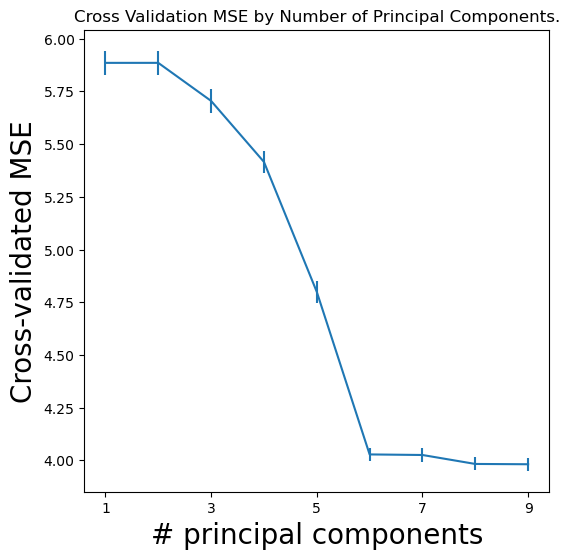

In [56]:
pcr_fig, ax = plt.subplots(figsize=(6,6))
n_comp = param_grid['pca__n_components']
ax.errorbar(n_comp,
            -grid.cv_results_['mean_test_score'],
            grid.cv_results_['std_test_score'] / np.sqrt(K))
ax.set_ylabel('Cross-validated MSE', fontsize=20)
ax.set_xlabel('# principal components', fontsize=20)
ax.set_xticks(n_comp[::2])
ax.set_title("Cross Validation MSE by Number of Principal Components.");

From the cross validation MSE plot, the optimal number of principal components to be used for analysis is 6. Beyong 6, new components cary very minimal information.

In [58]:
pipe.named_steps['pca'].explained_variance_ratio_

array([0.7562398 , 0.16247835, 0.03210528, 0.02085196, 0.01294042])

In [59]:
pipe.named_steps

{'scaler': StandardScaler(),
 'pca': PCA(n_components=5),
 'linreg': LinearRegression()}

In [60]:
pca = PCA(n_components=6)
linreg = LinearRegression()

scaler = StandardScaler(with_mean=True,  with_std=True)
pipe = Pipeline([('scaler', scaler), 
                 ('pca', pca),
                 ('linreg', linreg)])
X = train[model_columns].values
Y = train['Rings'].values
pipe.fit(X, Y)
pipe.named_steps['linreg'].coef_

array([ 0.7858737 ,  0.01301444, -0.79038682,  1.23997866,  2.31584348,
       -3.23974843])

In [61]:
y_pred_test = pipe.predict(test[model_columns].values)
y_pred_test

array([ 8.80490538, 10.21119141, 10.34639284, ..., 10.17662365,
       13.47316185,  8.36609166])

In [62]:
ev = pipe.named_steps['pca'].explained_variance_ratio_
for i in range(1,len(ev)):
    print(i, np.sum(ev[:i]))

1 0.7562397960041737
2 0.9187181439446049
3 0.9508234205344734
4 0.9716753834019268
5 0.9846157994889291


In [63]:
output_df_pca = pd.DataFrame({'id': test.Id, 'Rings': y_pred_test})
output_df_pca.to_csv('submission_pca.csv', index = False)
output_df_pca.head()

,id,Rings
0,90615,8.804905
1,90616,10.211191
2,90617,10.346393
3,90618,10.615780
4,90619,7.741730


## Using Lasso Regression to select features for regression model.
Since `Lasso Regression` performs feature selection by setting some coefficients to zero, we can use it to determine the most informative predictors for best subset selection.

### Step-by-Step Approach 
- Split into training and testing sets.
- Fit a Lasso regression model and analyze coefficient shrinkage.
- Select the best subset of features based on the nonzero coefficients.
- Train a linear model using the selected subset and compare performance.

In [65]:
# Train-test split
X = train[model_columns]
y = train['Rings']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit Lasso regression with cross-validation
lasso = LassoCV(cv=5, alphas=np.logspace(-4, 1, 50), random_state=42)
lasso.fit(X_train_scaled, y_train)

# Identify important features (nonzero coefficients)
selected_features = X.columns[lasso.coef_ != 0]
print("Selected Features:", list(selected_features))

Selected Features: ['Length', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Sex_M', 'Sex_F']


In [66]:
lasso.coef_

array([-0.21472   ,  0.76472658,  0.78328367,  1.71943787, -3.22108508,
       -0.70212491,  2.71002248,  0.32688224,  0.32380363])

### Use the lasso regression model to predict values and submit to competition.

In [68]:

y_pred_test = lasso.predict(scaler.transform(test[model_columns]))
output_df_lasso = pd.DataFrame({'id': test.Id, 'Rings': np.abs(y_pred_test)})
output_df_lasso.to_csv('submission_lasso.csv', index = False)
output_df_lasso.head()

,id,Rings
0,90615,8.555038
1,90616,10.023299
2,90617,10.306064
3,90618,10.938963
4,90619,7.779536


In [69]:
y_pred_test[y_pred_test<0].shape

(15,)

## Intepretation of Findings:

As we have seen above, using lasso regression did not yeild the expected results. We did not see any coefficient shrink to 0. Instead, this model was the first to produce negative values for the test set.

This suggests that the lasso shrank some coefficents (but did not reduce them to 0) which resulted in loss of information.

This could also indicate that all the features in the dataset contain some amount of useful information.

## Week4 
## Polynomial Regression

In the Week 2, I had use a polynomial regression with degree 2 polynomial but that choice was directed by visuallization of the data and not a statistical test.
Today, I will focus on trying polynomials of various degrees to see which is most appropriate. For want of compute power, I limit the polynomials to upto quartic.

Additionally, I introduce a scaller here and investigate it's impact.


In [72]:
X_train, X_test, y_train, y_test = train_test_split(train[model_columns], train.iloc[:,-1], test_size=0.10, random_state=622, stratify=train['Sex_F	Sex_M'.split()])

# Add a constant to the predictors (for the intercept)
scaler = StandardScaler(with_mean=True, with_std=True)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
results = {}
for degree in range(1,5):
    poly = PolynomialFeatures(degree = degree, interaction_only=True, include_bias=False)
    X_train1 = sm.add_constant(X_train)
    X_test1 = sm.add_constant(X_test)
    X_train1 = poly.fit_transform(X_train1)
    X_test1 = poly.transform(X_test1)
    
    # Fit the linear regression model
    model2 = LinearRegression()
    model2.fit(X_train1, y_train)
    r2 = model2.score(X_test1, y_test)
    params = model2.n_features_in_ - 1
    y_pred_test2 = model2.predict(X_test1)
    print(f'The coefficient of determination is {r2}')
    results[f'Polynomial(degree = {degree})'] = compute_and_print_mean_errors(y_test, y_pred_test2, params)


The coefficient of determination is 0.6087035082390033

 ME: -0.006 
 MPE: -0.035 
 MAE: 1.376 
 MSE: 3.983 
 MAPE: 0.139 
 myRMSLogError: 0.8967200834535043 
 R2: 0.6087035082390033 
 adjR2: 0.6083144595839162
The coefficient of determination is 0.6318175475731929

 ME: 0.003 
 MPE: -0.03 
 MAE: 1.329 
 MSE: 3.747 
 MAPE: 0.134 
 myRMSLogError: 0.8982150014279294 
 R2: 0.6318175475731929 
 adjR2: 0.6296101697080827
The coefficient of determination is 0.6417080113021458

 ME: 0.006 
 MPE: -0.029 
 MAE: 1.305 
 MSE: 3.647 
 MAPE: 0.131 
 myRMSLogError: 0.8980771745069107 
 R2: 0.6417080113021458 
 adjR2: 0.6346929549239049
The coefficient of determination is 0.6426020459192696

 ME: 0.007 
 MPE: -0.029 
 MAE: 1.304 
 MSE: 3.638 
 MAPE: 0.131 
 myRMSLogError: 0.8982197825245439 
 R2: 0.6426020459192696 
 adjR2: 0.6267854256165152


In [73]:
pd.DataFrame.from_dict(results, orient='index', columns = 'ME, MPE, myMAE, myMSE, myMAPE, myRMSLogError, myR2, adjR2'.split(', '))

,ME,MPE,myMAE,myMSE,myMAPE,myRMSLogError,myR2,adjR2
Polynomial(degree = 1),-0.006,-0.035,1.376,3.983,0.139,0.896720,0.608704,0.608314
Polynomial(degree = 2),0.003,-0.030,1.329,3.747,0.134,0.898215,0.631818,0.629610
Polynomial(degree = 3),0.006,-0.029,1.305,3.647,0.131,0.898077,0.641708,0.634693
Polynomial(degree = 4),0.007,-0.029,1.304,3.638,0.131,0.898220,0.642602,0.626785


## Observations from computing multiple polynomial models.

From the models, we see that the a decline in the custom score Root Mean Squared Log Erro for models from degree 1 to degree 3 accompanied with an increase in adjusted R-squared. After this point, the model starts showing a decline in both scores indicating that we have started overfitting.
Thus a cubic would be a better fit for the data.

Below, I fit a cubic, get predictions and submit the as part of the competition.

In [75]:
X_train, X_test, y_train, y_test = train_test_split(train[model_columns], train.iloc[:,-1], test_size=0.10, random_state=622, stratify=train['Sex_F	Sex_M'.split()])

# Add a constant to the predictors (for the intercept)
scaler = StandardScaler(with_mean=True, with_std=True)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

poly = PolynomialFeatures(degree = 3, interaction_only=True, include_bias=False)
X_train1 = sm.add_constant(X_train)
X_test1 = sm.add_constant(X_test)
X_train1 = poly.fit_transform(X_train1)
X_test1 = poly.transform(X_test1)

# Fit the linear regression model
model3 = LinearRegression()
model3.fit(X_train1, y_train)
r2 = model3.score(X_test1, y_test)
params = model3.n_features_in_ - 1
y_pred_test3 = model3.predict(X_test1)
print(f'The coefficient of determination is {r2}')
compute_and_print_mean_errors(y_test, y_pred_test3, params)


The coefficient of determination is 0.6417080113021458

 ME: 0.006 
 MPE: -0.029 
 MAE: 1.305 
 MSE: 3.647 
 MAPE: 0.131 
 myRMSLogError: 0.8980771745069107 
 R2: 0.6417080113021458 
 adjR2: 0.6346929549239049


[0.006,
 -0.029,
 1.305,
 3.647,
 0.131,
 0.8980771745069107,
 0.6417080113021458,
 0.6346929549239049]

In [76]:
X_test1.shape, X_train1.shape

((9062, 175), (81553, 175))

In [77]:
X = test[model_columns]
X_scaled = scaler.transform(X)
X_scaled = sm.add_constant(X_scaled)
X_scaled_poly = poly.transform(X_scaled)
y_pred = model3.predict(X_scaled_poly)
output_df = pd.DataFrame({'id': test.Id.values, 'Rings': y_pred})
output_df.to_csv('submission_polynomial_deg3.csv', index = False)
output_df.head()

,id,Rings
0,90615,9.596118
1,90616,9.587661
2,90617,10.442283
3,90618,10.017890
4,90619,7.651481


## Proof of submission

The image below shows my submission. This new submission would have put me in leaderboard position
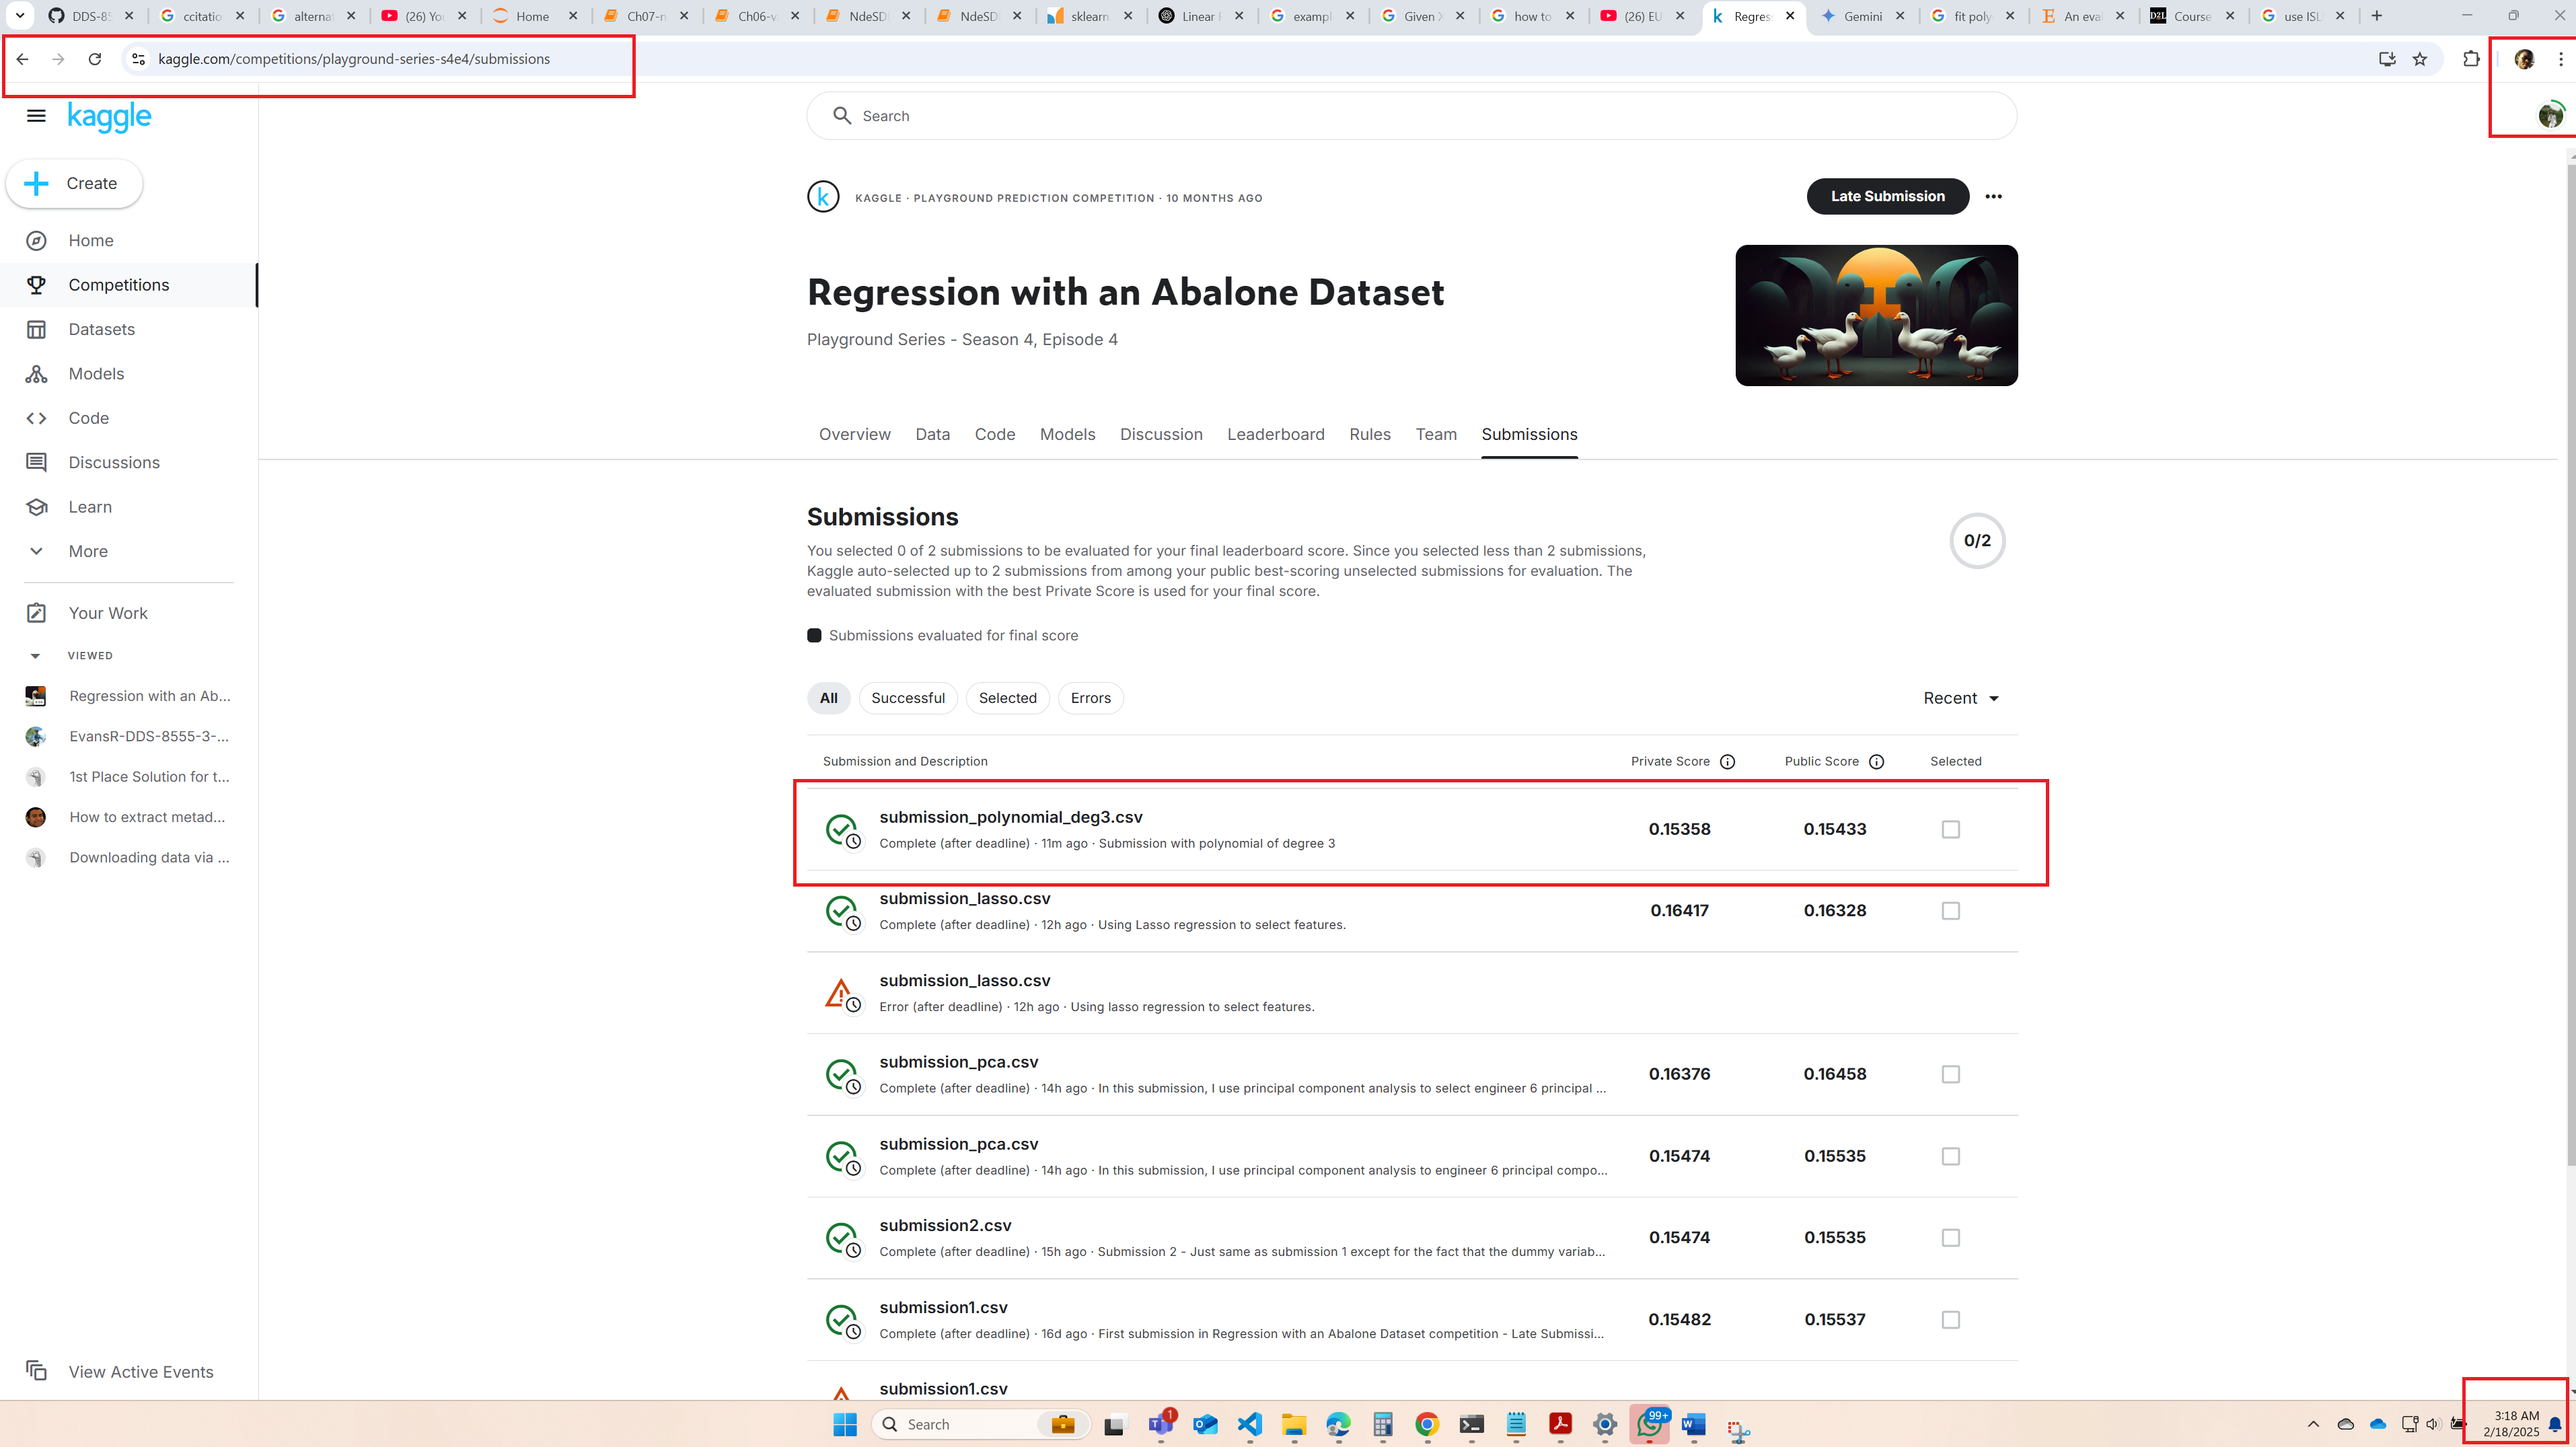

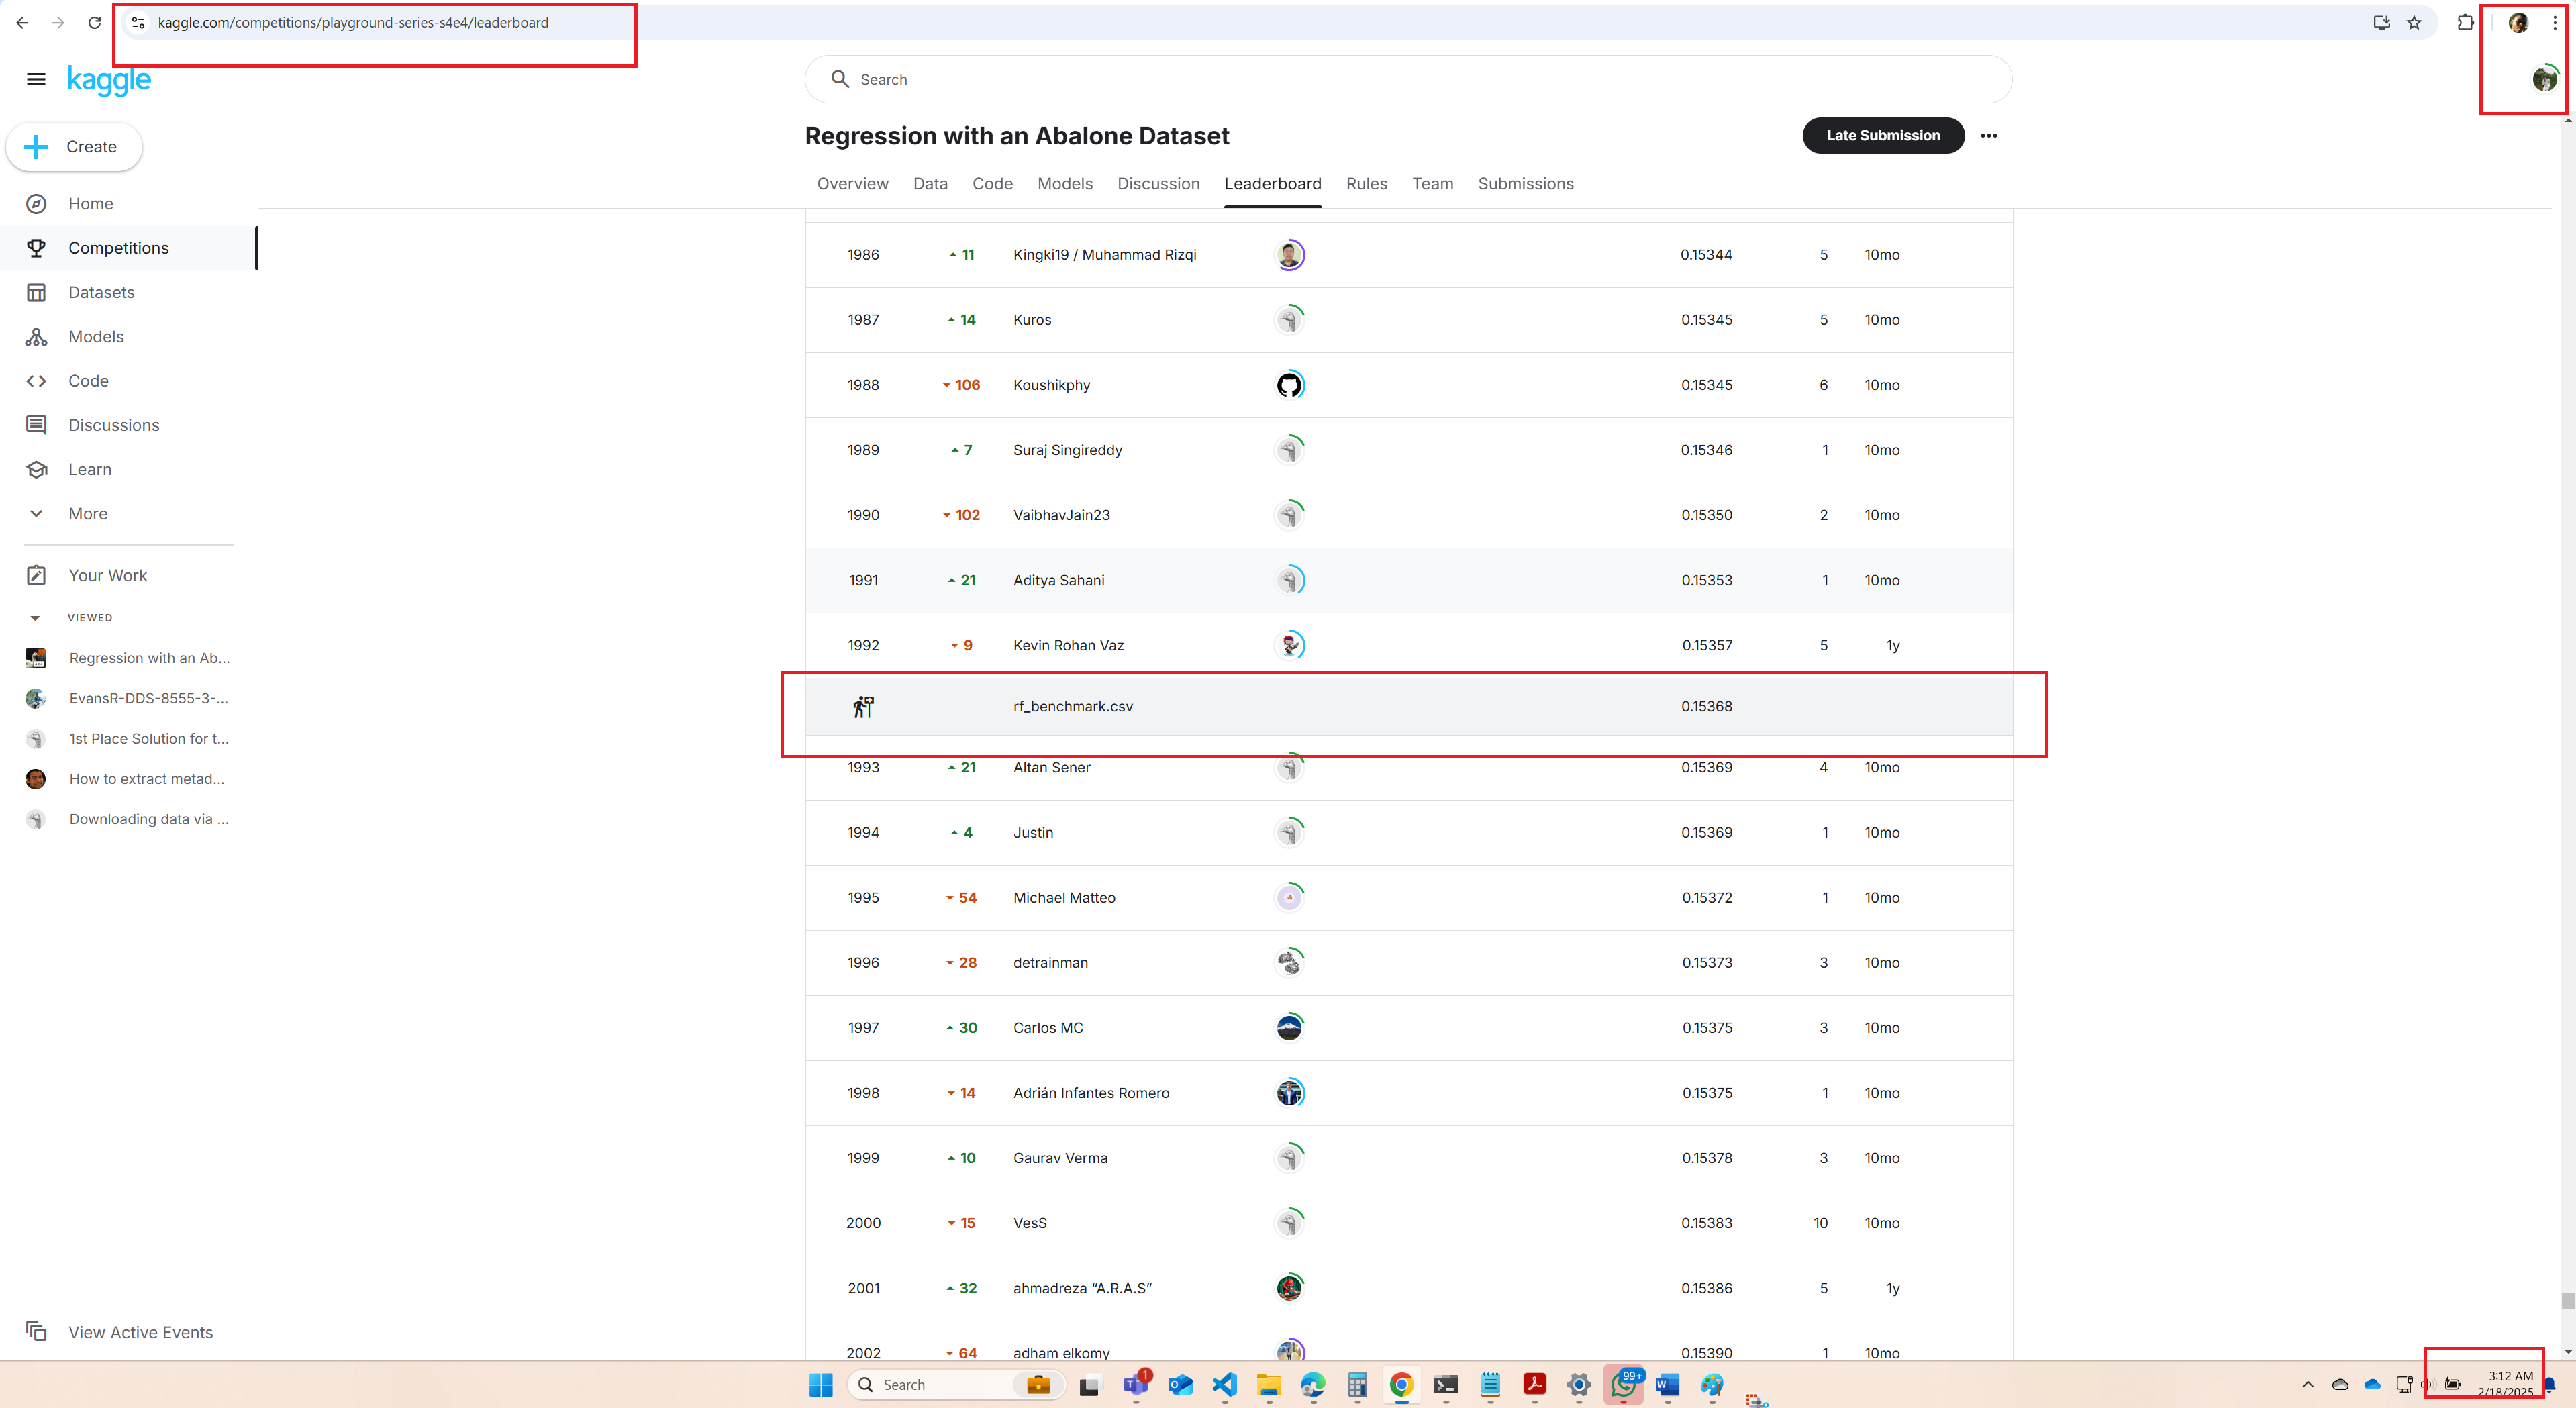